In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, roc_auc_score

(1) загрузите данные из прилагаемого файла (это двумерная выборка, целевая переменная на которой принимает значения 1 или -1)

In [160]:
df = pd.read_csv('./assets/logistic.csv', header=None)
df.head(5)

,0,1,2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750


In [161]:
df.rename(columns={1: 'x', 2: 'y', 0: 'class'}, inplace=True)
df.head(5)

,class,x,y
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750


(2) Как наблюдения распределились по классам? (сколько в каждом классе?). Для ответа используйте метод value_counts().

In [162]:
df.value_counts('class')

class
 1    105
-1    100
Name: count, dtype: int64

(3) Отобразите точками на плоскости признаки, различая классы цветом. Уберите данные, которые не попали в диапазон значений от -5 до 5 (будем считать их выбросами).

In [163]:
def plot_data(df):
    plt.figure(figsize=(8, 6))
    classes = df['class'].unique()
    colors = ['red', 'blue']
    for i, cls in enumerate(classes):
        subset = df[df['class'] == cls]
        plt.scatter(subset['x'], subset['y'], c=colors[i], label=f'Class {cls}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Classes visualization')
    plt.show()

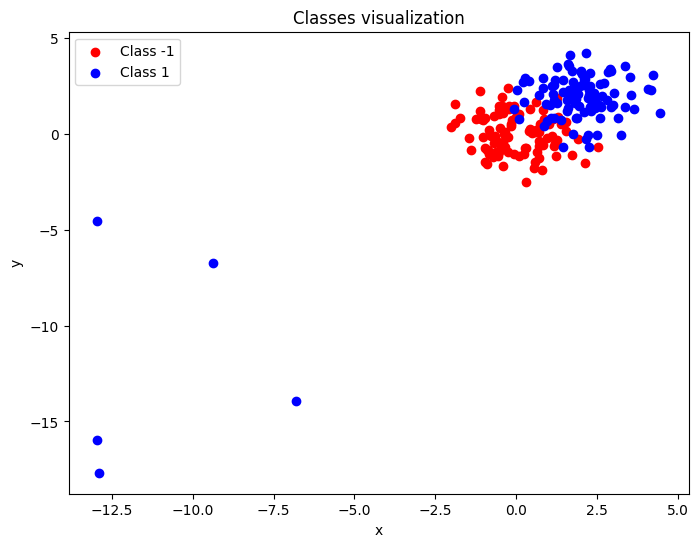

In [164]:
plot_data(df)

In [165]:
df.drop(df[(df['x'] < -5) | (df['x'] > 5)].index, inplace=True)

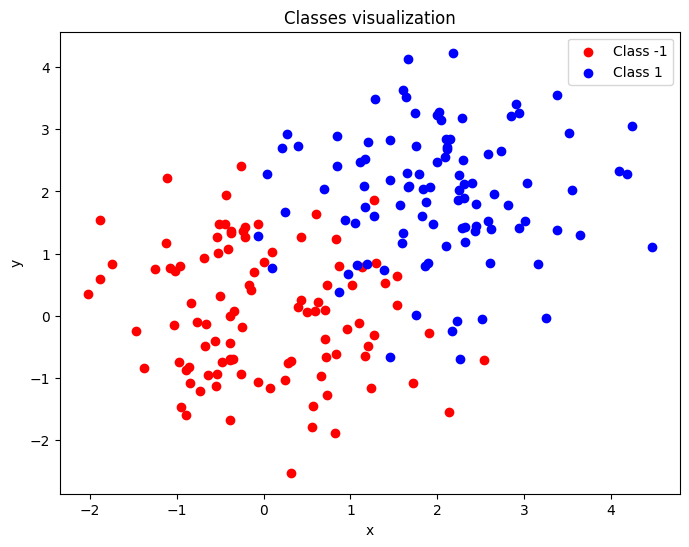

In [166]:
plot_data(df)

(4) Разделите данные на признаки и ответы.

In [167]:
df_shaffled = df.sample(frac=1)

In [168]:
Y = df_shaffled['class']
X = df_shaffled[['x', 'y']]

In [169]:
X.head()

,x,y
71,-0.430549,1.938754
60,1.865838,1.822790
100,2.233211,1.866868
42,1.071283,0.816013
59,2.114190,2.720490


In [170]:
Y.head()

71    -1
60     1
100    1
42     1
59     1
Name: class, dtype: int64

(5) Обучите модель логистической регрессии (LogisticRegression или LogisticRegression_CV, дайте описание гиперпараметров модели). Для обучения используйте всю выборку.

In [171]:
logistic_regression = LogisticRegressionCV(cv=2, solver='liblinear', penalty='l2')

In [172]:
logistic_regression.fit(X, Y)
logistic_regression.score(X, Y)

0.93

(6) Отобразите на ранее полученном рисунке гиперплоскость, получив необходимые коэффициенты из построенной модели.

In [173]:
def get_plane_equation(w1, w2, x1, b):
    return -(b + w1 * x1) / w2

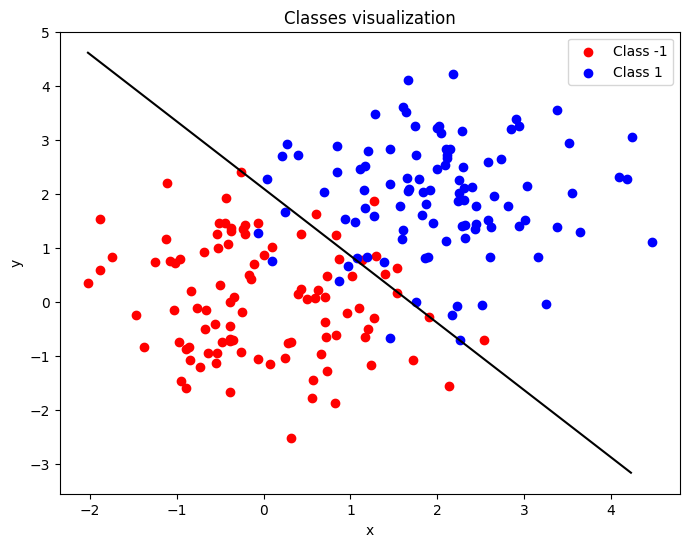

In [174]:
x_min = X['x'].min()
x_max = X['y'].max()
w1 = logistic_regression.coef_[0][0]
w2 = logistic_regression.coef_[0][1]
b = logistic_regression.intercept_[0]

y_min = get_plane_equation(w1, w2, x_min, b)
y_max = get_plane_equation(w1, w2, x_max, b)


plt.figure(figsize=(8, 6))
plt.plot([x_min, x_max], [y_min, y_max], c='black')
classes = df['class'].unique()
colors = ['red', 'blue']
for i, cls in enumerate(classes):
    subset = df[df['class'] == cls]
    plt.scatter(subset['x'], subset['y'], c=colors[i], label=f'Class {cls}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Classes visualization')
plt.show()


(7) получите матрицу несоответствий / ошибок (confusion matrix). Дайте пояснения. 

In [175]:
y_true = Y
y_pred = logistic_regression.predict(X)

true_positive, false_positive, false_negative, true_negative = confusion_matrix(y_true, y_pred).ravel()

conf_df = pd.DataFrame(data={
    'Positive (PP)': [true_positive, false_positive],
    'Negative (PN)': [false_negative, true_negative]
}, index=['Positive (P)', 'Negative (N)'])
conf_df

,Positive (PP),Negative (PN)
Positive (P),92,6
Negative (N),8,94


(8) Получите оценки качества классификации (на обучающей выборке): доля правильных ответов, точность, полнота, F-меру, AUC. Дайте пояснения.

In [176]:
all_count = true_positive + false_positive + false_negative + true_negative
score = (true_positive + true_negative) / all_count
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
F1 = 2 * precision * recall / (precision + recall)
auc = roc_auc_score(y_true, y_pred)

print('Score: ', score)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', F1)
print('AUC: ', auc)

Score:  0.93
Precision:  0.92
Recall:  0.9387755102040817
F1:  0.9292929292929293
AUC:  0.9299999999999999


(9) В окрестности гиперплоскости задайте некоторое количество случайных точек (отобразите их на рисунке новым цветом). Определите при помощи построенной модели принадлежность классу

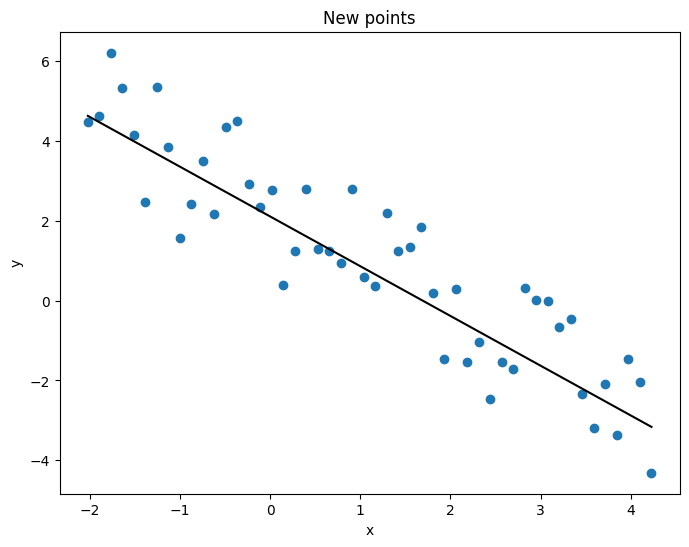

In [177]:
x_gen = np.linspace(x_min, x_max, 50).tolist()
y_gen = []

for x in x_gen:
    y_gen.append(get_plane_equation(w1, w2, x, b) + random.uniform(-2, 2))

plt.figure(figsize=(8, 6))
plt.plot([x_min, x_max], [y_min, y_max], c='black')
plt.scatter(x_gen, y_gen)
plt.xlabel('x')
plt.ylabel('y')
plt.title('New points')
plt.show()

In [178]:
X_gen = pd.DataFrame({'x': x_gen, 'y': y_gen})
K_gen = np.array(logistic_regression.predict(X_gen))
Y_gen = pd.DataFrame({'class': K_gen})
df = pd.concat([X_gen, Y_gen], axis=1)
df.head()

,x,y,class
0,-2.020378,4.460037,-1
1,-1.892854,4.630778,1
2,-1.765330,6.202229,1
3,-1.637805,5.307488,1
4,-1.510281,4.146884,1


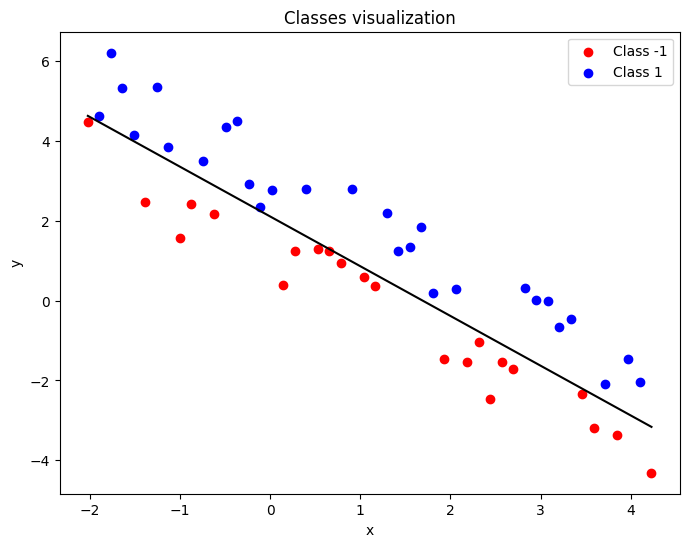

In [179]:
plt.figure(figsize=(8, 6))
plt.plot([x_min, x_max], [y_min, y_max], c='black')
classes = df['class'].unique()
colors = ['red', 'blue']
for i, cls in enumerate(classes):
    subset = df[df['class'] == cls]
    plt.scatter(subset['x'], subset['y'], c=colors[i], label=f'Class {cls}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Classes visualization')
plt.show()